In [5]:
year=2019
month=10

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [2]:
conn=db.get_conn()

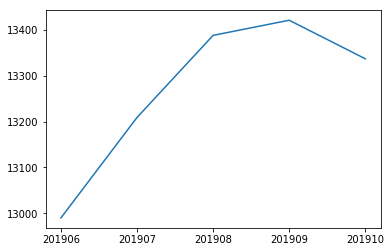

In [29]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
plt.plot("Month","Salary_Mean",data=stat_data)

[0.15058385039641503, 0.14672742157876595, 0.11568209238193726, 0.06608712512926578, 0.520919510513616]


Text(0.5, 1.0, 'Age of Jobs')

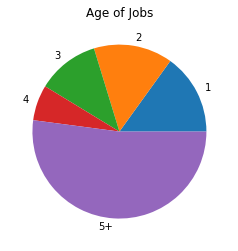

In [26]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")